In [1]:
# basic library
import pandas as pd
import numpy as np
import numpy as np
# import re
# import string
# import os
# import seaborn as sns
import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# model
# import torch
# from torch.utils.data import DataLoader, TensorDataset

# stop words
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# stememer
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# nltk corpus
# import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models import KeyedVectors

# other preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# training pipline
import tensorflow as tf
import numpy as np
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import load_model

# label encoding
label_type = ['NotPromotion', 'Promotion']

In [2]:
# %load_ext cudf.pandas

# %pip install seaborn
# %pip install Sastrawi
# %pip install wordcloud
# %pip install torch
# %pip install transformers
# %pip install nltk
# %pip install tensorflow
# %pip install gensim --upgrade
# %pip install Sastrawi
# %pip install fasttext-wheel
# %pip install gensim

# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [3]:
combined_data = pd.read_csv('../Dataset/dataset_combined_new - dataset_combined_new.csv', sep=',')
training_data = pd.read_csv('../Dataset/train.csv', sep=',').dropna()
testing_data = pd.read_csv('../Dataset/test.csv', sep=',')
validation_data = pd.read_csv('../Dataset/val.csv')

# training_data = training_data.sample(frac = 1)
training_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Dataset/dataset_combined_new - dataset_combined_new.csv'

In [4]:
print("train isna:",training_data['text'].isna().sum())
print("test isna:",testing_data['text'].isna().sum())
print("val isna:",validation_data['text'].isna().sum())

print(training_data[training_data['text'].isna()][['text', 'label']])


train isna: 0
test isna: 0
val isna: 0
Empty DataFrame
Columns: [text, label]
Index: []


# Preprocessing

In [5]:
stop_factory = StopWordRemoverFactory()
sastrawi_stopwords = stop_factory.get_stop_words()
custom_stopwords = ['aku', 'yg', 'kamu']
drop_stopwords = ['pula', 'pasti', 'amat', 'ingin', 'sampai']

sastrawi_stopwords += custom_stopwords
sastrawi_stopwords = [word for word in sastrawi_stopwords if word not in drop_stopwords]

pattern = r"[^A-Za-z ]"

print(stopwords)

<WordListCorpusReader in 'C:\\Users\\tyogo\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


In [6]:
def preprocess_text(texts):
    sentences=[]
    for index, text in enumerate(texts):

        word_list = word_tokenize(text)
        word_list = [word for word in word_list if word not in sastrawi_stopwords]
        
        text = ' '.join(word_list)
        texts[index] = text
        sentences.append(word_list)
    return texts, sentences

In [7]:
texts_raw_train = training_data['text'].values.copy()
texts_raw_val = validation_data['text'].values.copy()
texts_raw_test = testing_data['text'].values.copy()
y_train = training_data['label'].values.copy()
y_val = validation_data['label'].values.copy()
y_test = testing_data['label'].values.copy()

In [8]:
texts_train,sentences = preprocess_text(texts_raw_train)
texts_val,_ = preprocess_text(texts_raw_val)
texts_test,_ = preprocess_text(texts_raw_test)

texts_train

array(['Mencari pengalaman daring lancar ? AERO88 mungkin solusinya .',
       'Itu kayanya kasih tanda deh lewatin apa ngga , contohnya kerucut+tong sampah biru',
       'Whatsapp Telegram Livechat Daftar Login Hdtoto Beranda Slot Online Live Casino Sportsbook Arcade Togel Poker slider Jackpot Daily Wins Gates of Olympus Bonanza Gold < Starlight Princess Sweet power thor megaways Treasure Wild Aztec Gems Gatot Kaca Popular Games bowl Mahjong Ways Break Away Lucky Wilds Koi Gate 1000 Wishes Gem Saviour Conquest Chronicles X Up Gold Blitz Elven Roma Silverback Multiplier Mountain Fiery Sevens Hot Phoenix Rises Neko Fortune Tiger garuda Treasures Bandito fireworks Dreams Macau Rooster Rumble > Platform Hiburan Terbaru No.1 Indonesia Penyedia pragmatic pgsoft habanero cq9 spadegaming ttg joker microgaming ion sexy gaming allbet idnlive saba sports Metode Pembayaran Transfer Bank Pulsa E-Money ©2024 Hdtoto . All rights reserved | 18+',
       ..., 'Kerennn',
       'Saya merekomendasikan ρ

# Tokenization & Vectorizer

In [9]:
# Define parameters

EMBEDDING_DIM = 300
MAX_LEN = 128

## Torch Tokenization

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts_train)

train_texts_seq = tokenizer.texts_to_sequences(texts_train)
val_texts_seq = tokenizer.texts_to_sequences(texts_val)
test_texts_seq = tokenizer.texts_to_sequences(texts_test)

train_texts_padded = pad_sequences(train_texts_seq, maxlen=MAX_LEN, padding='post', truncating='post')
val_texts_padded = pad_sequences(val_texts_seq, maxlen=MAX_LEN, padding='post', truncating='post')
test_texts_padded = pad_sequences(test_texts_seq, maxlen=MAX_LEN, padding='post', truncating='post')

In [11]:
train_texts_padded.shape

(2736, 128)

In [12]:
VOCAB_SIZE = len(tokenizer.word_index) + 1
VOCAB_SIZE

11021

In [13]:
# texts_raw_train
texts_train[410]

'Rezeki gak putusnya , makasi █▓▒▒░░░PU LAU 777░░░▒▒▓█ .'

In [27]:
index = 410
print("Original text:", texts_train[index])
print("\nTokenized sequence:", train_texts_seq[index])
print("\nActual words:", [tokenizer.index_word.get(idx, '') for idx in train_texts_seq[index]])
# train_texts_seq

Original text: Rezeki gak putusnya , makasi █▓▒▒░░░PU LAU 777░░░▒▒▓█ .

Tokenized sequence: [48, 44, 3276, 1938, 1939, 1940, 1941]

Actual words: ['rezeki', 'gak', 'putusnya', 'makasi', '█▓▒▒░░░pu', 'lau', '777░░░▒▒▓█']


## FastText Vectorizer 

In [14]:
# Download pretrained FastText model
import gzip
import os
import urllib.request

url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz'
gz_filename = 'cc.id.300.vec.gz'
vec_filename = 'cc.id.300.vec'

if not os.path.exists(vec_filename):
    print("Downloading pretrained FastText model...")
    urllib.request.urlretrieve(url, gz_filename)
    
    with gzip.open(gz_filename, 'rb') as f_in:
        with open(vec_filename, 'wb') as f_out:
            f_out.write(f_in.read())
    
    os.remove(gz_filename)
    print("Download complete!")
else:
    print("Pretrained FastText model already exists.")

Pretrained FastText model already exists.


In [ ]:
embedding_file = "cc.id.300.vec"
embedding_dict = {}

with open(embedding_file, "r", encoding="utf-8") as f:
    next(f) 
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_dict[word] = vector

In [ ]:
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word, index in tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
fasttext_model_pretrain = KeyedVectors.load_word2vec_format("cc.id.300.vec", encoding='utf-8')

In [ ]:
fasttext_model_pretrain.similar_by_word('pula')

[('Begitu', 0.707301676273346),
 ('juga', 0.6792619824409485),
 ('sebaliknya', 0.6539739966392517),
 ('baikpula', 0.6477072238922119),
 ('demikian', 0.6436917781829834),
 ('bila', 0.6306520700454712),
 ('Demikian', 0.6302143335342407),
 ('apabila', 0.6267390251159668),
 ('tidakpula', 0.6253125667572021),
 ('lagi', 0.6234062910079956)]

In [ ]:
fasttext_model_pretrain.get_vector('pulau')

array([-8.200e-03, -7.770e-02,  2.010e-02,  1.444e-01,  2.710e-02,
       -1.464e-01, -5.400e-03,  2.220e-02, -8.600e-03, -4.140e-02,
       -2.680e-02,  1.150e-02,  5.200e-03,  9.700e-03,  6.920e-02,
       -5.390e-02, -1.024e-01,  2.420e-02,  2.920e-02,  2.990e-02,
       -1.190e-02,  2.290e-02,  2.050e-02,  1.270e-01,  1.610e-02,
       -7.720e-02, -2.300e-03,  8.760e-02,  1.253e-01,  7.950e-02,
       -1.110e-02, -1.400e-02,  1.990e-02,  4.720e-02,  1.242e-01,
        3.520e-02, -6.200e-03,  1.340e-02,  5.900e-03,  5.570e-02,
       -8.400e-02,  3.640e-02, -6.900e-02,  9.240e-02,  2.460e-02,
        3.010e-02, -3.950e-02, -3.980e-02,  9.820e-02,  2.710e-02,
       -1.120e-02,  3.540e-02, -1.950e-02, -7.640e-02,  5.200e-02,
       -3.510e-02,  3.050e-02, -5.430e-02, -5.700e-02,  5.100e-03,
        6.900e-03,  5.370e-02,  4.880e-02,  8.740e-02, -2.910e-02,
        4.100e-02,  6.660e-02,  2.760e-02,  5.120e-02,  6.740e-02,
        1.770e-02, -6.860e-02,  5.360e-02,  7.380e-02, -2.830e

# Training

In [ ]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional, Input
from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

drop_value = 0.2
# n_dense = 24

In [ ]:
def build_model():
    # Input layer
    sentence_indices = Input(shape=(MAX_LEN,), dtype='int32')
    
    # Embedding layer
    embeddings = Embedding(
        input_dim=VOCAB_SIZE, 
        output_dim=EMBEDDING_DIM, 
        weights=[embedding_matrix],
        trainable=False
    )(sentence_indices)
    
    # LSTM layers
    X = SpatialDropout1D(drop_value)(embeddings)
    X = Bidirectional(LSTM(64, return_sequences=True))(X)
    X = Dropout(0.3)(X)
    X = LSTM(32, return_sequences=True)(X)
    X = Dropout(0.3)(X)
    X = Flatten()(X)
    
    # Dense layers
    X = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(X)
    X = Dropout(0.2)(X)
    X = Dense(1, activation='sigmoid')(X)
    
    # Model definition
    model = Model(inputs=sentence_indices, outputs=X)
    
    return model

model = build_model()
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_11 (Embedding)        │ (None, 128, 300)       │     3,306,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_9             │ (None, 128, 300)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 128, 128)       │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 128, 32)        │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,644,925 (13.90 MB)

 Trainable params: 338,625 (1.29 MB)

 Non-trainable params: 3,306,300 (12.61 MB)

In [51]:
# model = Sequential()

# model.add(Embedding(
#     input_dim=VOCAB_SIZE, 
#     output_dim=EMBEDDING_DIM, 
#     weights=[embedding_matrix], 
#     trainable=False
#     ))
# # model.add(GlobalAveragePooling1D())
# model.add(SpatialDropout1D(drop_value))

# model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Dropout(0.3))

# model.add(LSTM(32, return_sequences=True))
# model.add(Dropout(0.3))

# # model.add(GlobalAveragePooling1D())
# model.add(Flatten())

# # Fully connected layers
# model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
# # model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))

# # Output layer
# model.add(Dense(1, activation='sigmoid'))

# print(model.summary())

In [62]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.685027541311968, 1: 1.851150202976996}

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

checkpoint_callback = ModelCheckpoint(filepath='./best_model_checkpoint.keras',  
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      save_weights_only=False,  # Save full model (architecture + weights)
                                      verbose=1)
# early_stop = EarlyStopping(monitor='val_loss', patience=3)

num_epochs = 100
history = model.fit(
    train_texts_padded,
    y_train,
    validation_data=(val_texts_padded,y_val),
    epochs=num_epochs,
    callbacks=[checkpoint_callback],
    class_weight=class_weights
)


Epoch 1/100


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6836 - loss: 1.3068
Epoch 1: val_accuracy improved from -inf to 0.68805, saving model to ./best_model_checkpoint.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.6835 - loss: 1.3067 - val_accuracy: 0.6880 - val_loss: 1.2554
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6614 - loss: 1.2357
Epoch 2: val_accuracy improved from 0.68805 to 0.69096, saving model to ./best_model_checkpoint.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.6613 - loss: 1.2355 - val_accuracy: 0.6910 - val_loss: 1.1911
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6555 - loss: 1.1726
Epoch 3: val_accuracy did not improve from 0.69096
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.6554 - loss: 1.1725 - val_accuracy: 0.6822 - val_loss: 1.1338
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6468 - loss: 1.1169
Epoch 4: val_accuracy did not improve from 0.69096
86/86 ━━━

In [ ]:
model = load_model("best_model_checkpoint.keras")
model.save("../Model/LSTM_FASTTEXT_PRETRAIN_TORCH_EMBEDDING_TRAINABLEFALSE.h5")
model.save("../Model/LSTM_FASTTEXT_PRETRAIN_TORCH_EMBEDDING_TRAINABLEFALSE.keras")

# Eval

In [2]:
model = load_model("../../Trained Model - H5 - TF/LSTM_FASTTEXT_PRETRAIN_TORCH_EMBEDDING_TRAINABLEFALSE.keras")

c:\Users\tyogo\.conda\envs\nlp\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 15 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [7]:
model.evaluate(test_texts_padded, y_test, verbose=0)


NameError: name 'test_texts_padded' is not defined

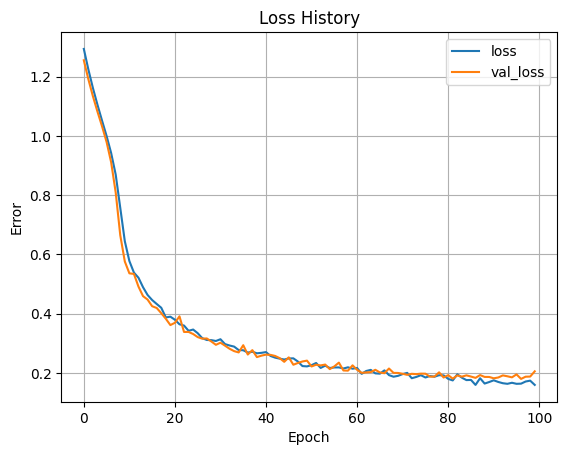

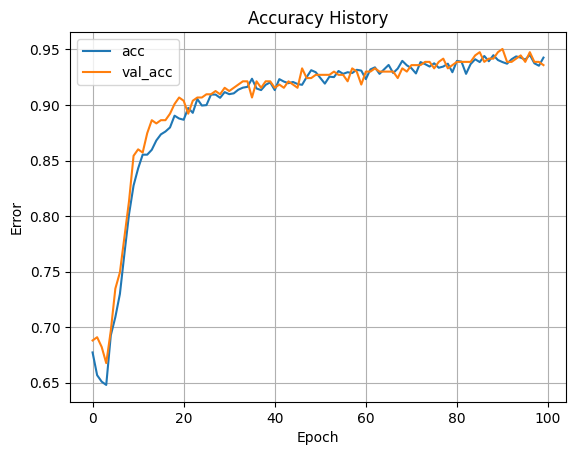

In [67]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
# plt.ylim([0, 0.2])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.title("Loss History")
plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.title("Accuracy History")
plt.grid(True)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Accuracy Score: 0.9415204678362573
F1 Score: 0.8901098901098901
Recall Score: 0.9
Precision Score: 0.8804347826086957
Classification Report: 
              precision    recall  f1-score   support

NotPromotion       0.96      0.96      0.96       250
   Promotion       0.90      0.88      0.89        92

    accuracy                           0.94       342
   macro avg       0.93      0.92      0.93       342
weighted avg       0.94      0.94      0.94       342

Confusion Matrix:



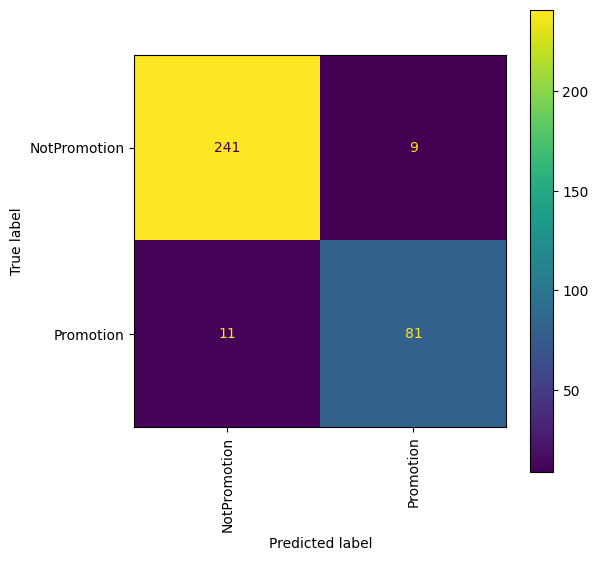

In [77]:
# pred = model.predict((test_texts_padded, y_test))
pred = model.predict(test_texts_padded)
y_pred = [0 if pred < 0.5 else 1 for pred in pred]

print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"F1 Score: {f1_score(y_pred, y_test)}")
print(f"Recall Score: {recall_score(y_pred, y_test)}")
print(f"Precision Score: {precision_score(y_pred, y_test)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred, target_names=label_type)}")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels = label_type)

fig, ax = plt.subplots(figsize=(6,6))
print(f"Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [78]:
for idx,i in enumerate(y_pred):
    if i != y_test[idx]:
        print(idx+1,")❌pred:", i, "| label:", y_test[idx], texts_test[idx])
        continue
    print(idx+1,") pred:", i, "| label:", y_test[idx], texts_test[idx])

1 ) pred: 1 | label: 1 INFO CINA777APK CINA777RTP CINA777Logo24/11/2024 ( Min ) 14.56 ( GMT+07 ) Versi MobileVersi WAP ( NEX4D ) Nama PenggunaKata SandiLupa Kata Sandi ? DaftarHomeTogelHot GamesSlotsLive CasinoOlahragaCrash GameArcadePokerE-SportsSabung AyamPromosiWelcome to situs resmi CINA777 | Kami membayar berapapun kemenangan player.HasilPasaranBuku MimpiHasil TerakhirStatistik MarketGame PopulerMahjong Wins 3 – Black ScatterMAINMahjong Wins 3 – Black ScatterMahjong WaysMAINMahjong WaysMighty HerculesMAINMighty HerculesSlot88 BonanzaMAINSlot88 BonanzaLe PharaohMAINLe PharaohPirate Quest 1000MAINPirate Quest 1000SixSixSixMAINSixSixSixWay of NinjaMAINWay of Ninja888 GoldMAIN888 GoldMahjong Ways 2MAINMahjong Ways 2Gates of Olympus 1000™MAINGates of Olympus 1000™Wild Bounty ShowdownMAINWild Bounty ShowdownLucky Twins NexusMAINLucky Twins NexusNexus Koi GateMAINNexus Koi GateThe CryptMAINThe CryptLucky Twins Power ClustersMAINLucky Twins Power ClustersMentalMAINMentalFortune Gems 2MAIN

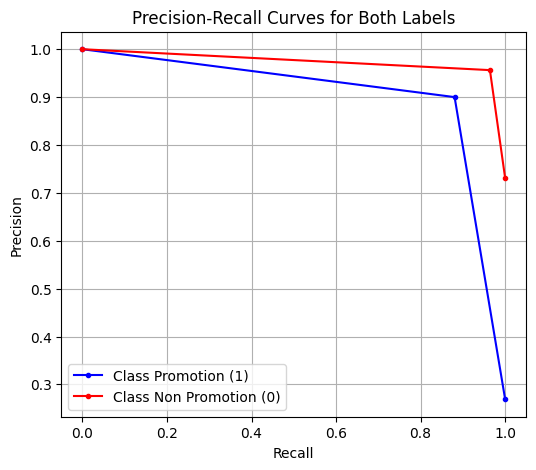

In [79]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall values for class 1 (positive class)
precision_1, recall_1, _ = precision_recall_curve(y_test, y_pred)

# Compute precision-recall values for class 0 (negative class)
y_scores_neg = 1 - np.array(y_pred)  # Since model predicts class 1 probabilities, class 0 is (1 - probability)
precision_0, recall_0, _ = precision_recall_curve(1 - y_test, y_scores_neg)

# Plot Precision-Recall curves for both classes
plt.figure(figsize=(6, 5))
plt.plot(recall_1, precision_1, marker='.', label=f'Class Promotion (1)', color='blue')
plt.plot(recall_0, precision_0, marker='.', label=f'Class Non Promotion (0)', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Both Labels')
plt.legend()
plt.grid()
plt.show()

ROC AUC Score: 0.9713


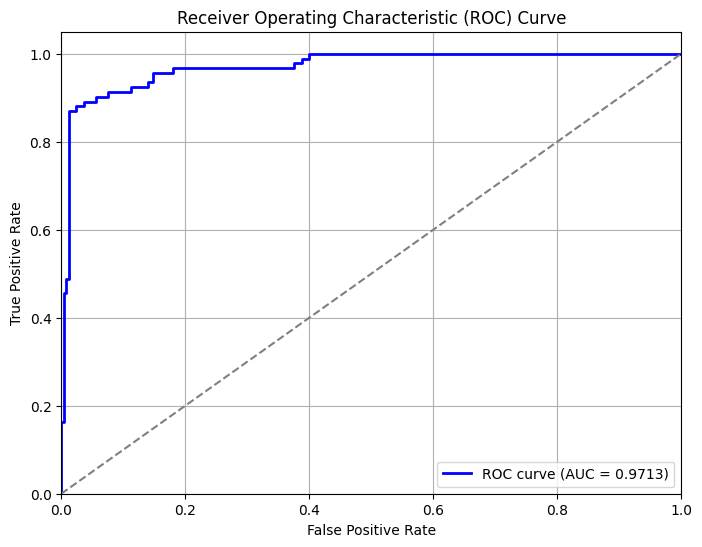

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, pred)
print(f"ROC AUC Score: {auc_score:.4f}")

# Plot ROC curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [89]:
def predict_sentiment(text):    
    text_copy = text.copy()
    use_text,_ = preprocess_text(text_copy)
    # inputs = tokenizer(use_text, padding=True, truncation=True, return_tensors='tf', max_length=512)
    use_text = tokenizer.texts_to_sequences(use_text)
    use_text = pad_sequences(use_text, maxlen=MAX_LEN, padding='post', truncating='post')

    pred = model.predict(use_text)
    # pred_labels = tf.argmax(pred, axis=1)
    pred_labels = [0 if pred < 0.5 else 1 for pred in pred]
    # print(pred)
 
    pred_labels = [label_type[label] for label in pred_labels]
    for index, preds in enumerate(pred_labels):
        print(f"{text[index]}: {preds}")
text = [
    "Aku adalah seorang mahasiswa",
    "Judi Online Disebut Masuk Tahap Sosial, Cak Imin: 8,8 Juta Pasien Minta Direhabilitasi Jumat, 15 Nov",
    "Gacor xxtoto menang pasti dibayar",
    "dp jd jt buruan gas garansi meteorwin",
    "gacor pasti menang di xxtoto",
    "top up di kantorbola pasti gampang menangnya",
    "gratis koin buruan topup di agencasinoindonesia",
    "gratis koin buruan topup di fairbet88.com, segera daftarkan akun anda",
    "DEWA-DORA tuh situs yang paling enak withdraw tiap hari! 😖 😣",
    "DEWA-DORA tuh situs    yang paling gampang narik tiap hari! 😖 😣",
    "Gua setia maen di DEWADORA, tempat terbaik!",
    "kantorbola99.club - Mau Jackpot x50 x100 x500 x1000 pasti dibayar ? gabung dan Menang berapapun dibayar.",
    "dapatkan banyak rejekii di DEWADORА!"
]
predict_sentiment(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Aku adalah seorang mahasiswa: NotPromotion
Judi Online Disebut Masuk Tahap Sosial, Cak Imin: 8,8 Juta Pasien Minta Direhabilitasi Jumat, 15 Nov: Promotion
Gacor xxtoto menang pasti dibayar: Promotion
dp jd jt buruan gas garansi meteorwin: NotPromotion
gacor pasti menang di xxtoto: Promotion
top up di kantorbola pasti gampang menangnya: Promotion
gratis koin buruan topup di agencasinoindonesia: Promotion
gratis koin buruan topup di fairbet88.com, segera daftarkan akun anda: Promotion
DEWA-DORA tuh situs yang paling enak withdraw tiap hari! 😖 😣: Promotion
DEWA-DORA tuh situs    yang paling gampang narik tiap hari! 😖 😣: Promotion
Gua setia maen di DEWADORA, tempat terbaik!: Promotion
kantorbola99.club - Mau Jackpot x50 x100 x500 x1000 pasti dibayar ? gabung dan Menang berapapun dibayar.: Promotion
dapatkan banyak rejekii di DEWADORА!: Promotion


In [ ]:
from tensorflow.keras.utils import plot_model

# First compile your model (if not already done)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate a plot of the model
plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # TB for vertical, LR for horizontal layout
    dpi=96
)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
